In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.externals.six import StringIO

import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 

import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  cross_val_score

from IPython.display import Image
from scipy.stats import randint

/home/cordeiro/env/py3im/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#carrega a base iris do próprio sckit-learn
iris = load_iris()

# carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)

As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


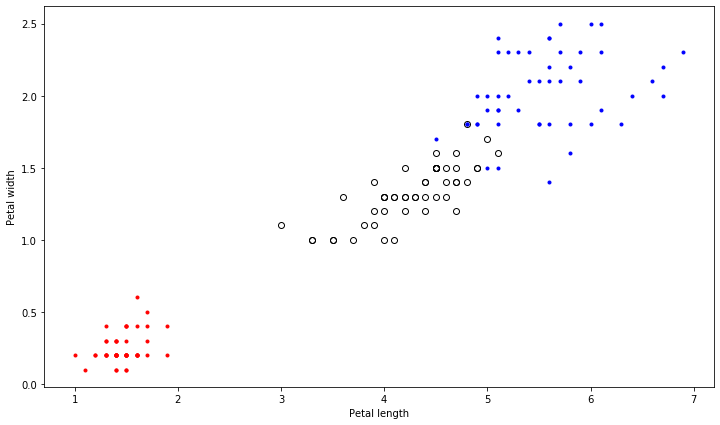

In [3]:
##########################
#Exercício 01
##########################

#plote o gráfico de dispersão. 
#Dica: analise o vetor de labels (y) e plote com cores 
#diferentes as características comprimento e largura da pétala 
#(armazenadas em X) de cada rótulo.
plt.figure(figsize=(12,7))
plt.plot(X[y==0][:,2], X[y==0][:,3], 'r.')
plt.plot(X[y==1][:,2], X[y==1][:,3], 'ko', markerfacecolor='none', markeredgecolor='k')
plt.plot(X[y==2][:,2], X[y==2][:,3], 'b.')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


#analise visualmente como seriam as fronteiras de decisão, 
#considerando apenas cortes ortogonais.


In [4]:
#separando em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

# imprime as dimensões das bases
print("Dimensões das bases de treinamento e teste:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensões das bases de treinamento e teste:
(120, 4)
(30, 4)
(120,)
(30,)


In [5]:
#classificação utilizando uma árvore de decisão não otimizada

#cria o classificador
clf = tree.DecisionTreeClassifier(criterion='gini') #testar com (criterion='entropy')

A acurácia permaneceu igual com os dois parâmetros (=0.9)

In [6]:

#treina o classificador com a base de treinamento
clf = clf.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf.predict(X_test)

##########################
#Exercício 02 - A
#mostrar a acurácia
##########################
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy %.4f\n"% acc)


Accuracy 0.9333



Para o teste, acertou 90% dos casos

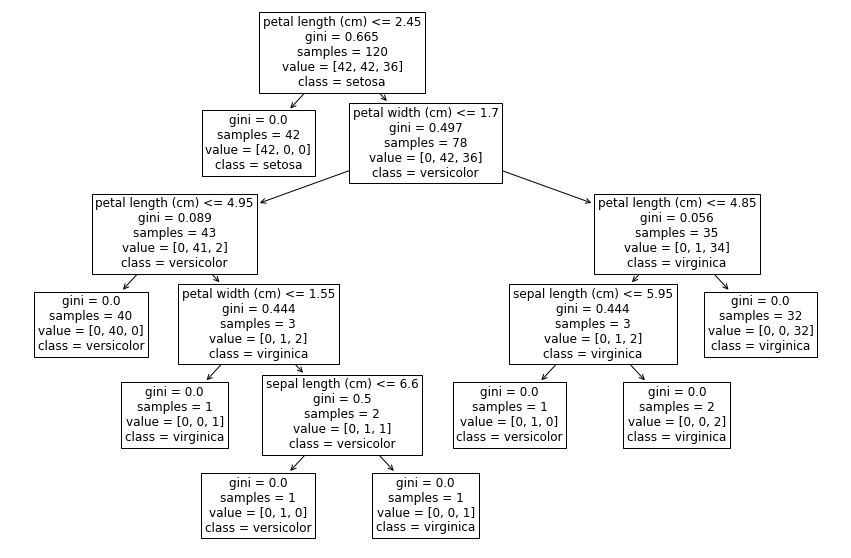

In [7]:

##########################
#Exercício 02 - B
##Analise a árvore de decisão criada
##########################
#cria uma imagem para mostrar a árvore de decisão criada
'''
out = StringIO()
tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT.png', 'wb') as f:
    f.write(graph.create_png())
Image("irisDT.png") 
'''

plt.figure(figsize=(15,10))
a = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)    

Sim, pode-se fazer melhorias diminuindo, por exemplo, a altura da árvore ("ignora" os ramos com poucos samples). Com isso, apesar de introduzir um pequeno erro, usaria menos características e menos decisões, mas manteria uma boa precisão

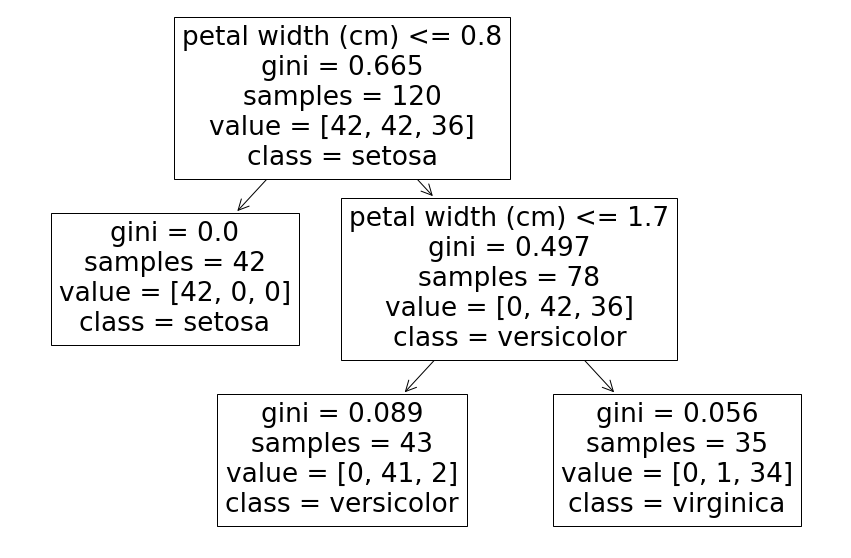

In [8]:
##########################
#Exercício 02 - C
##Crie um classificador (ie, uma árvore de decisão) com os parâmetros 
##definidos manualmente por você
mytree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2) 
                                #min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False

mytree = mytree.fit(X_train, y_train)

plt.figure(figsize=(15,10))
a = tree.plot_tree(mytree, feature_names=iris.feature_names, class_names=iris.target_names)
#procure informações na documentação.
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
##########################

In [9]:
#classificação utilizando uma árvore de decisão otimizada, onde os parâmetros são definidos pela função RandomizedSearchCV

clf_rs = DecisionTreeClassifier()

##########################
#Exercício 03 - A
#Analisar os parâmetros utilizados pela RandomizedSearchCV()
##########################
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": randint(1, 20),
                  "min_samples_leaf": randint(1, 20),
                  "max_leaf_nodes": randint(2, 20)}
   
# roda a randomized search     
clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

Não é igual ao __GridSearchCV__ pois não avalia todas as possibilidades. O número de possibilidades/tentativas é dado por __n_iter__. Os parâmetros utilizados na busca é dado por __param_distributions__.
 - criterion: função de critério.
 - min_samples_split: número mínimo de amostras para realizar um split.
 - max_depth: altura máxima da árvore.
 - min_samples_leaf: número mínimo de amostras para uma folha.
 - max_leaf_nodes: número máximo de folhas

In [10]:
##########################
#Exercício 03 - B
#Treinar e testar o classificador. Depois, mostrar as métricas de avaliação 
#(mesmos passos realizados para a árvore não otimizada)
##########################

#treina o classificador com a base de treinamento
clf_rs.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf_rs.predict(X_test)
        
#mostrar a acurácia
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)


Accuracy
 0.9666666666666667


In [11]:
clf_rs.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 13,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [12]:
##########################
#Exercício 03 - C
#Analisar os parâmetros (e índices) testados na RandomizedSearchCV()
##########################
print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score']
stds = clf_rs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))


Parâmetros e índices do melhor estimador encontrado:
{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 3, 'min_samples_split': 5}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=13,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Índices para todos os testes realizados pela RandomizedSearchCV():
0.942 (+/-0.024) for {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 9, 'min_samples_leaf': 12, 'min_samples_split': 8}
0.942 (+/-0.024) for {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 16, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.942 (+/-0.024) for {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 8, 

In [13]:
##########################
#Exercício 03 - D
##Compare a árvore de decisão com a anterior (não-otimizada)
##########################

out = StringIO()
tree.export_graphviz(clf_rs.best_estimator_, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT-RS.png', 'wb') as f:
    f.write(graph.create_png())    
Image("irisDT-RS.png") 

'''
plt.figure(figsize=(15,10))
a = tree.plot_tree(clf_rs, feature_names=iris.feature_names, class_names=iris.target_names)
'''

'\nplt.figure(figsize=(15,10))\na = tree.plot_tree(clf_rs, feature_names=iris.feature_names, class_names=iris.target_names)\n'

A segunda árvore possui uma altura menor, folhas com mais amostras e obteve uma melhor acurácia no dados de testes. Outro fato é que a segunda árvore não utiliza o dado _sepal width_. Algumas podas podiam ser feitas na segunda árvore (certas ramificações levam na mesma classe).

***
# KFold

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

### 2 a)

In [15]:
n = 10
kas = list()
acuracias = list()
melhorAcuracia = 0
melhorK = 0

In [16]:
%%time
#procurando o melhor K utilizando Hold Out
for k in range(1,51):
    accacc = 0
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        preditor = classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, preditor)
        #print("Accuracy %.4f"% acc)
        accacc = accacc + acc #acumulador de acuracias
    kas.append(k)
    acuracias.append(accacc/n)
    if ((accacc/n) > melhorAcuracia):
        melhorAcuracia = accacc/n
        melhorK = k
        
    print("Average Accuracy %.4f with k = %d"% (accacc/n, k))
print("Best K: %d"%melhorK)

Average Accuracy 0.9433 with k = 1
Average Accuracy 0.9467 with k = 2
Average Accuracy 0.9650 with k = 3
Average Accuracy 0.9450 with k = 4
Average Accuracy 0.9617 with k = 5
Average Accuracy 0.9600 with k = 6
Average Accuracy 0.9583 with k = 7
Average Accuracy 0.9350 with k = 8
Average Accuracy 0.9550 with k = 9
Average Accuracy 0.9550 with k = 10
Average Accuracy 0.9667 with k = 11
Average Accuracy 0.9550 with k = 12
Average Accuracy 0.9583 with k = 13
Average Accuracy 0.9617 with k = 14
Average Accuracy 0.9667 with k = 15
Average Accuracy 0.9533 with k = 16
Average Accuracy 0.9317 with k = 17
Average Accuracy 0.9550 with k = 18
Average Accuracy 0.9467 with k = 19
Average Accuracy 0.9350 with k = 20
Average Accuracy 0.9517 with k = 21
Average Accuracy 0.9567 with k = 22
Average Accuracy 0.9333 with k = 23
Average Accuracy 0.9417 with k = 24
Average Accuracy 0.9333 with k = 25
Average Accuracy 0.9433 with k = 26
Average Accuracy 0.9283 with k = 27
Average Accuracy 0.9433 with k = 28
A

Percebe-se que, inicialmente, não há uma diferença tão significativa, mas a acurácia vai piorando conforme k aumenta muito

### 2 b)

In [17]:
n = 5

kasfold = list()
acuraciasfold = list()
melhorAcuraciafold = 0
melhorKfold = 0

In [18]:
%%time
#procurando o melhor K utilizando validação cruzada
kf = KFold(n_splits = n)
for k in range(1,51):
    accacc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        preditor = classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, preditor)
        #print("Accuracy %.4f"% acc)
        accacc = accacc + acc
    kasfold.append(k)
    acuraciasfold.append(accacc/n)
    if ((accacc/n) > melhorAcuraciafold):
        melhorAcuraciafold = accacc/n
        melhorKfold = k
    print("Average Accuracy %.4f with k = %d"% (accacc/n, k))
print("Best K: %d"%melhorKfold)

Average Accuracy 0.9267 with k = 1
Average Accuracy 0.9067 with k = 2
Average Accuracy 0.9067 with k = 3
Average Accuracy 0.9067 with k = 4
Average Accuracy 0.9133 with k = 5
Average Accuracy 0.9067 with k = 6
Average Accuracy 0.9200 with k = 7
Average Accuracy 0.9133 with k = 8
Average Accuracy 0.9200 with k = 9
Average Accuracy 0.9200 with k = 10
Average Accuracy 0.9133 with k = 11
Average Accuracy 0.8933 with k = 12
Average Accuracy 0.9067 with k = 13
Average Accuracy 0.9000 with k = 14
Average Accuracy 0.9000 with k = 15
Average Accuracy 0.8867 with k = 16
Average Accuracy 0.8800 with k = 17
Average Accuracy 0.8667 with k = 18
Average Accuracy 0.8867 with k = 19
Average Accuracy 0.8667 with k = 20
Average Accuracy 0.8667 with k = 21
Average Accuracy 0.8667 with k = 22
Average Accuracy 0.8667 with k = 23
Average Accuracy 0.8467 with k = 24
Average Accuracy 0.8600 with k = 25
Average Accuracy 0.8467 with k = 26
Average Accuracy 0.8467 with k = 27
Average Accuracy 0.8200 with k = 28
A

Usando k-fold, o valor de K ficou em 1 em todas as execuções

### 2 c)

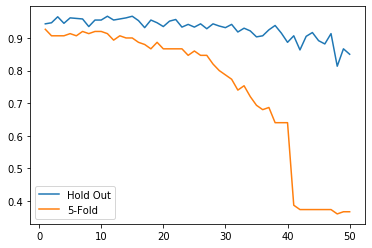

In [19]:
plt.plot(kas, acuracias, label = 'Hold Out')
plt.plot(kasfold,acuraciasfold, label = '5-Fold')
plt.legend()
plt.show()

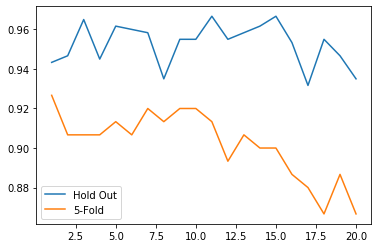

In [20]:
#Só as primeiras 20
n = 20
plt.plot(kas[:n], acuracias[:n], label = 'Hold Out')
plt.plot(kasfold[:n],acuraciasfold[:n], label = '5-Fold')
plt.legend()
plt.show()

# 3
Aplicando para o melhor K encontrado:

In [21]:
from sklearn.metrics import classification_report

In [22]:
#Metricas - KNN
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
classifier = KNeighborsClassifier(n_neighbors = melhorK)
classifier.fit(X_train, y_train)
preditor = classifier.predict(X_test)
report = classification_report(y_test, preditor, target_names=iris.target_names)
confusionMatrix = sklearn.metrics.confusion_matrix(y_test, preditor)
print(report)
print("Confusion Matrix:")
print(confusionMatrix)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.92      0.96        24
   virginica       0.90      1.00      0.95        19

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
[[17  0  0]
 [ 0 22  2]
 [ 0  0 19]]


Usando árvore de decisão criada anteriormente:

In [23]:
#Metricas - Decision Tree
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
mytree = DecisionTreeClassifier(criterion='gini', splitter='best') 
                                #min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False

mytree = mytree.fit(X_train, y_train)

#testa o classificador com a base de testes
preditorTree = mytree.predict(X_test)

report = classification_report(y_test, preditorTree, target_names=iris.target_names)
confusionMatrix = sklearn.metrics.confusion_matrix(y_test, preditorTree)
print(report)
print("Confusion Matrix:")
print(confusionMatrix)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.87      0.93        23
   virginica       0.85      1.00      0.92        17

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60

Confusion Matrix:
[[20  0  0]
 [ 0 20  3]
 [ 0  0 17]]


-------------------------------------------------------------------------------------------------------------------------------

# 4. MNIST
Usando a base de dados MNIST (https://www.kaggle.com/c/digit-recognizer/) + K-Fold

In [24]:
import pandas as pd

In [25]:
# abrindo dados 
df = pd.read_csv("digit-recognizer/train.csv")
print(df.shape)
df.head(2)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#pegando somente os 10% dos dados
df = df.iloc[:4200] 
X = df.drop(['label'],axis=1)
y = df.label
X.shape,y.shape

((4200, 784), (4200,))

In [27]:
#auxiliares
n = 5

kasfold = list()
acuraciasfold = list()
melhorAcuraciafold = 0
melhorKfold = 0

In [28]:
%%time
#procurando o melhor K utilizando validação cruzada
n = 5
kf = KFold(n_splits = n)
for k in range(1,21):
    accacc = 0
    i = 1
    for train_index, test_index in kf.split(X):
        print('%d-'%i,end='')
        i+=1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        preditor = classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, preditor)
        #print("Accuracy %.4f"% acc)
        accacc = accacc + acc
    kasfold.append(k)
    acuraciasfold.append(accacc/n)
    if ((accacc/n) > melhorAcuraciafold):
        melhorAcuraciafold = accacc/n
        melhorKfold = k
    print("   Average Accuracy %.4f with k = %d"% (accacc/n, k))
print("Best K: %d"%melhorKfold)

1-2-3-4-5-   Average Accuracy 0.9214 with k = 1
1-2-3-4-5-   Average Accuracy 0.9048 with k = 2
1-2-3-4-5-   Average Accuracy 0.9181 with k = 3
1-2-3-4-5-   Average Accuracy 0.9193 with k = 4
1-2-3-4-5-   Average Accuracy 0.9210 with k = 5
1-2-3-4-5-   Average Accuracy 0.9174 with k = 6
1-2-3-4-5-   Average Accuracy 0.9183 with k = 7
1-2-3-4-5-   Average Accuracy 0.9198 with k = 8
1-2-3-4-5-   Average Accuracy 0.9179 with k = 9
1-2-3-4-5-   Average Accuracy 0.9164 with k = 10
1-2-3-4-5-   Average Accuracy 0.9140 with k = 11
1-2-3-4-5-   Average Accuracy 0.9121 with k = 12
1-2-3-4-5-   Average Accuracy 0.9090 with k = 13
1-2-3-4-5-   Average Accuracy 0.9069 with k = 14
1-2-3-4-5-   Average Accuracy 0.9055 with k = 15
1-2-3-4-5-   Average Accuracy 0.9060 with k = 16
1-2-3-4-5-   Average Accuracy 0.9026 with k = 17
1-2-3-4-5-   Average Accuracy 0.9043 with k = 18
1-2-3-4-5-   Average Accuracy 0.9010 with k = 19
1-2-3-4-5-   Average Accuracy 0.8983 with k = 20
Best K: 1
CPU times: user 6mi

In [31]:
#Metricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
classifier = KNeighborsClassifier(n_neighbors = melhorK)
classifier.fit(X_train, y_train)
preditor = classifier.predict(X_test)
report = classification_report(y_test, preditor, target_names=np.arange(10).astype('str'))
confusionMatrix = sklearn.metrics.confusion_matrix(y_test, preditor)
print(report)
print("Confusion Matrix:")
print(confusionMatrix)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       162
           1       0.82      0.98      0.90       191
           2       0.96      0.85      0.90       185
           3       0.82      0.88      0.85       147
           4       0.96      0.87      0.91       176
           5       0.92      0.89      0.91       166
           6       0.94      0.98      0.96       189
           7       0.88      0.87      0.88       143
           8       0.95      0.75      0.84       162
           9       0.82      0.89      0.85       159

    accuracy                           0.90      1680
   macro avg       0.90      0.89      0.89      1680
weighted avg       0.90      0.90      0.90      1680

Confusion Matrix:
[[158   0   0   0   0   1   2   1   0   0]
 [  0 188   1   0   0   0   1   0   1   0]
 [  4  12 158   2   0   0   0   7   2   0]
 [  2   4   3 129   0   4   1   1   3   0]
 [  0   4   0   0 153   0   1   1   0  17]
 [  0   